In [1]:
import json
import pickle
import numpy as np
import pandas as pd


with open('./Models/dt1_model.sav', 'rb') as f:
    dt1 = pickle.load(f)
print(type(dt1))

with open('./Models/dt2_model.sav', 'rb') as f:
    dt2 = pickle.load(f)
print(type(dt2))

with open('./Models/dt3_model.sav', 'rb') as f:
    dt3 = pickle.load(f)
print(type(dt3))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [2]:
X_train = np.load('./Our_Saved/X_train.npy')
X_test = np.load('./Our_Saved/X_test.npy')
y_train = np.load('./Our_Saved/y_train.npy')
y_test = np.load('./Our_Saved/y_test.npy')

In [3]:
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

print(X_combined.shape)
print(y_combined.shape)

(24, 500, 3)
(24,)


In [4]:
X_dt1=np.hstack((X_combined[:,:,0],X_combined[:,:,1],X_combined[:,:,2]))

print(f"X: {X_dt1.shape}")
print(f"y: {y_combined.shape}")

X: (24, 1500)
y: (24,)


# Plotting

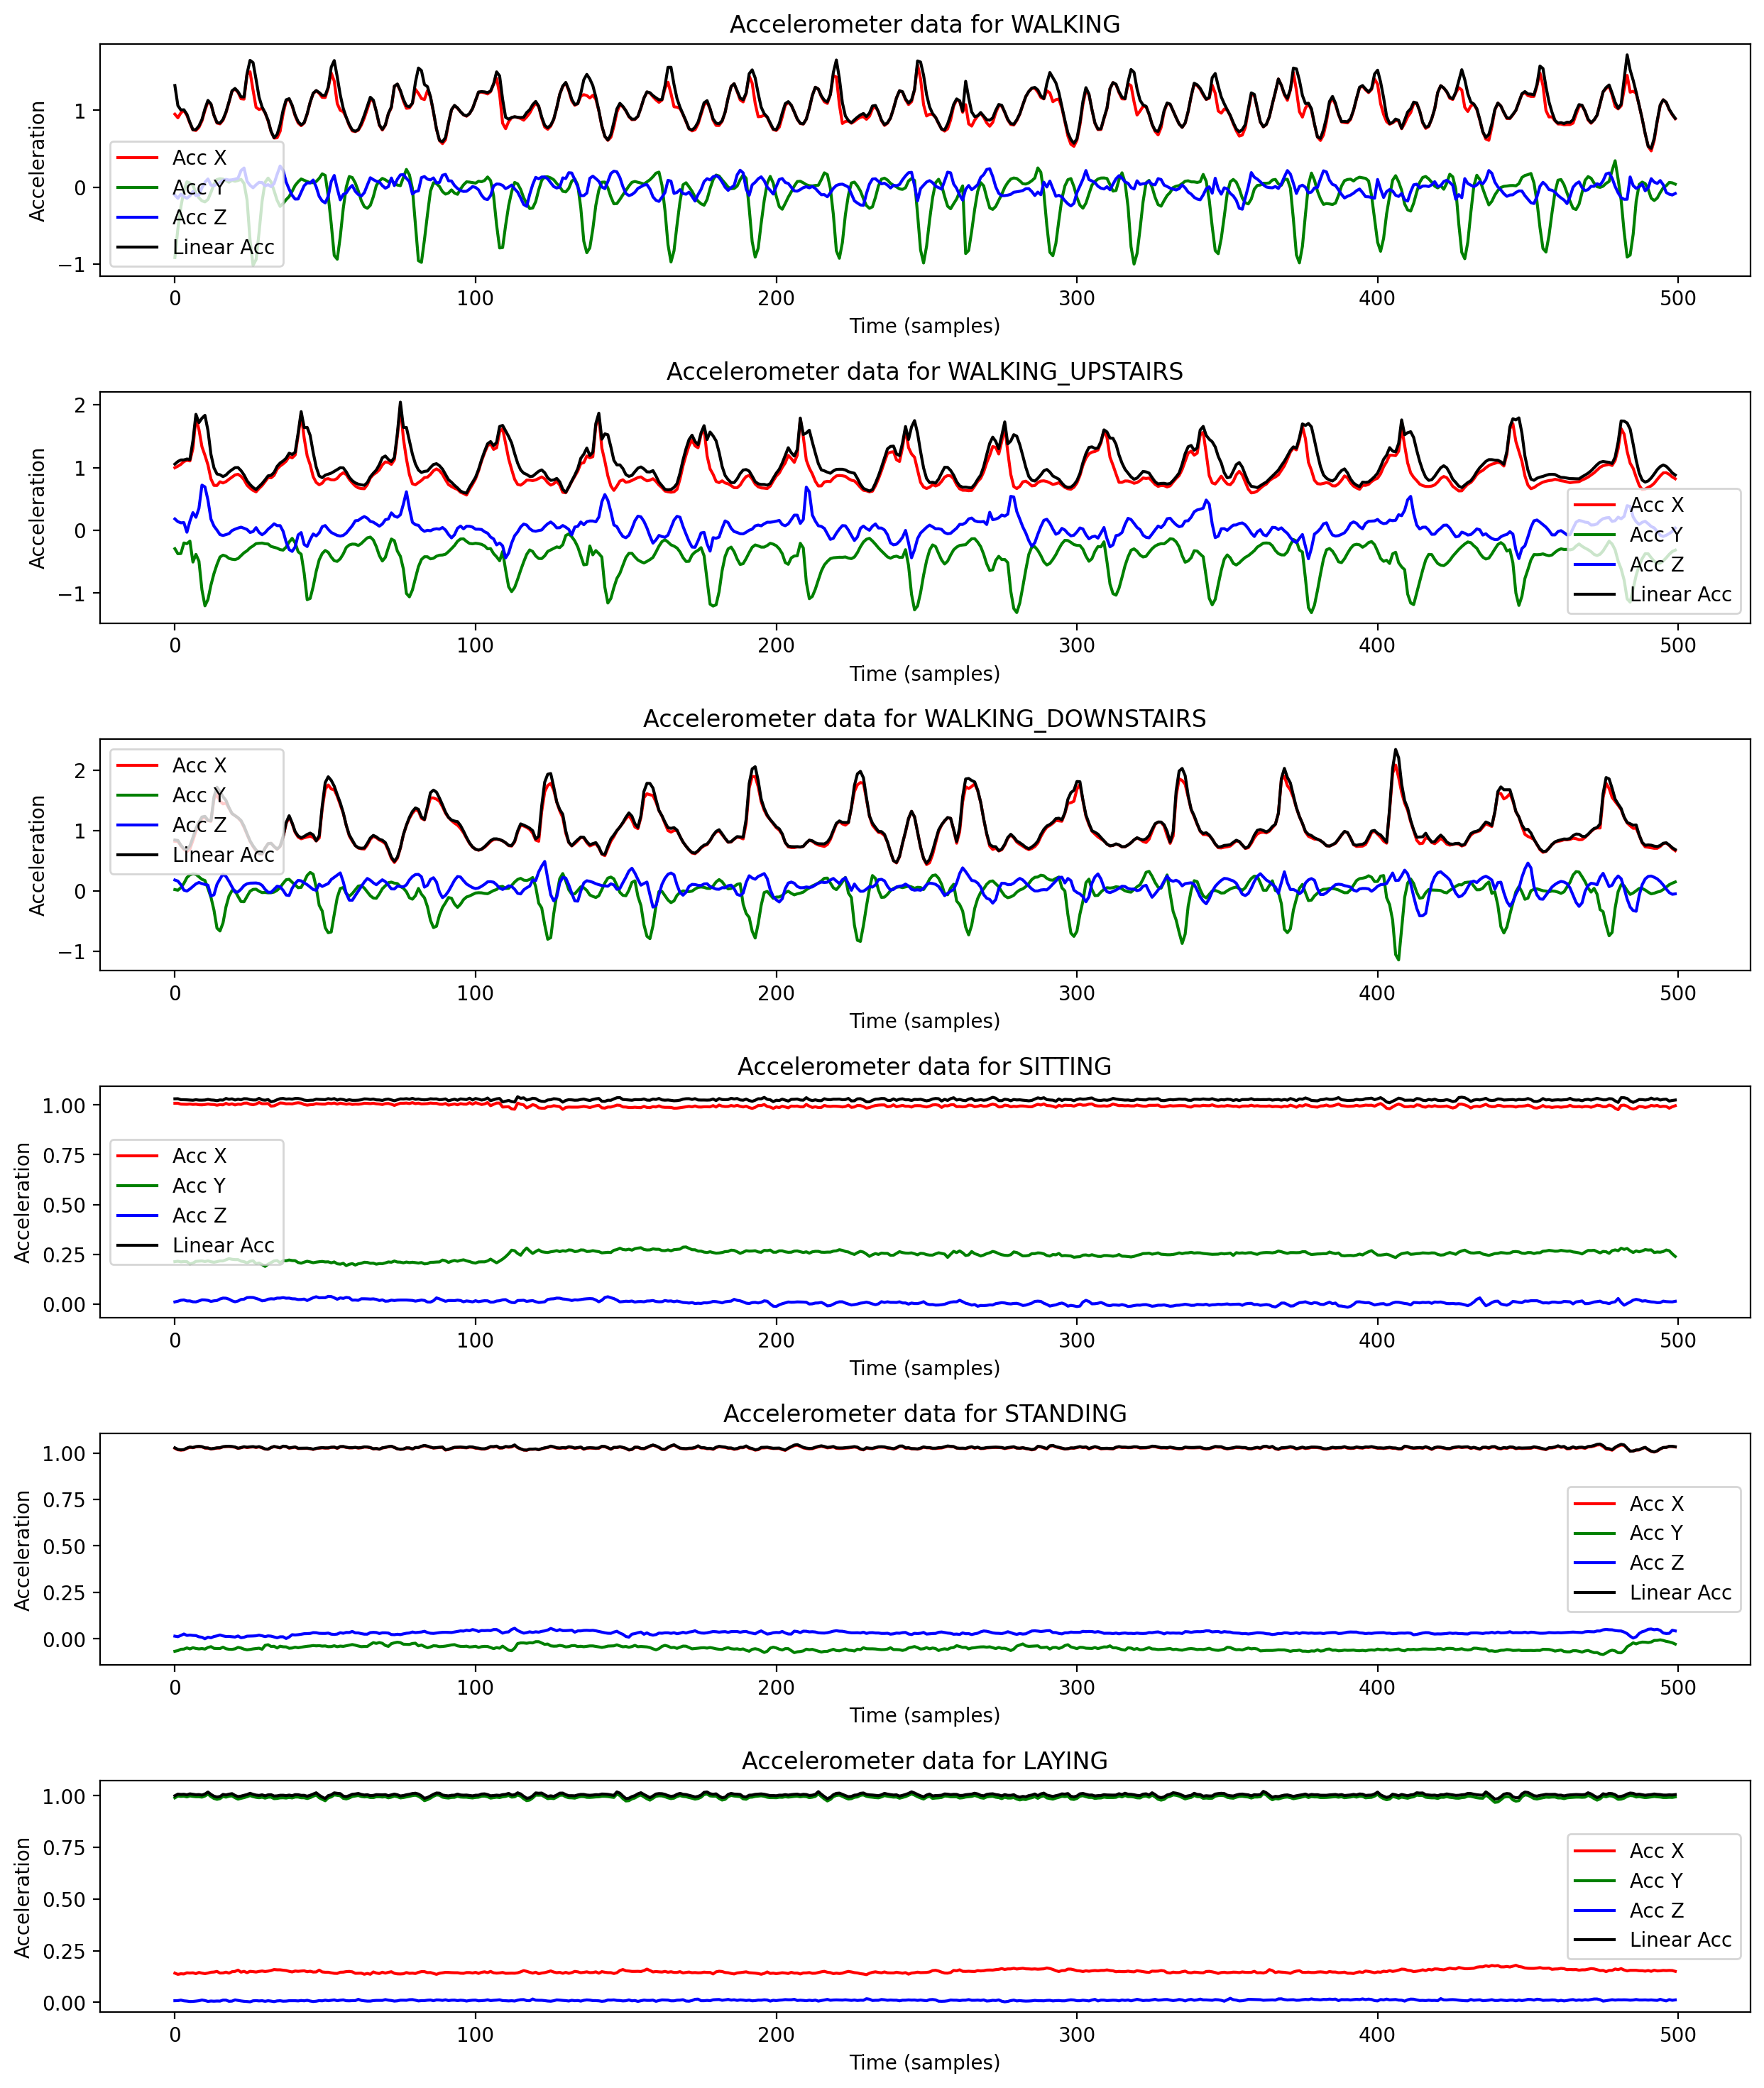

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# mapping class labels to activity names , as provided in activity_labels.txt
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}


activity_samples = {}# stores one sample from each activity class
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_combined[y_combined == activity_class][0]

# Set up the figure and gridspec
fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(len(classes), 1, hspace=0.5)

# Plot each activity's accelerometer data along with the linear acceleration
for i, (activity_name, sample) in enumerate(activity_samples.items()):
    ax = fig.add_subplot(gs[i, 0])
    
    # Calculate linear acceleration
    linear_acc = np.sqrt(np.sum(sample**2, axis=1))
    
    # Plot the x, y, z acceleration data
    ax.plot(sample[:, 0], label='Acc X', color='red')
    ax.plot(sample[:, 1], label='Acc Y', color='green')
    ax.plot(sample[:, 2], label='Acc Z', color='blue')
    
    # Plot the linear acceleration
    ax.plot(linear_acc, label='Linear Acc', color='black')
    
    ax.set_title(f"Accelerometer data for {activity_name}")
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Acceleration")
    ax.legend()

plt.show()

# Raw Data Decision Tree

In [6]:
from sklearn import metrics

y_dt1_pred = dt1.predict(X_dt1)

y_combined = np.array(y_combined)
y_dt1_pred = np.array(y_dt1_pred)

# Calculate metrics
accuracy = metrics.accuracy_score(y_combined, y_dt1_pred)
precision = metrics.precision_score(y_combined, y_dt1_pred, average='macro')
recall = metrics.recall_score(y_combined, y_dt1_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Create and display comparison DataFrame
comparison_df = pd.DataFrame({
    'True Label': y_combined,
    'Predicted Label': y_dt1_pred
})

Accuracy:  0.5416666666666666
Precision:  0.5416666666666666
Recall:  0.5416666666666666


# TSFEL Decision Tree

In [7]:

import tsfel

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_dt2 = tsfel.time_series_features_extractor(cfg, X_combined, verbose=1, fs=50)

print(f"X: {X_dt2.shape}")
print(f"y: {y_combined.shape}")


*** Feature extraction started ***



*** Feature extraction finished ***
X: (24, 1152)
y: (24,)


In [8]:
from sklearn import metrics

y_dt2_pred = dt2.predict(X_dt2)

y_combined = np.array(y_combined)
y_dt2_pred = np.array(y_dt2_pred)

# Calculate metrics
accuracy = metrics.accuracy_score(y_combined, y_dt2_pred)
precision = metrics.precision_score(y_combined, y_dt2_pred, average='macro')
recall = metrics.recall_score(y_combined, y_dt2_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Create and display comparison DataFrame
comparison_df = pd.DataFrame({
    'True Label': y_combined,
    'Predicted Label': y_dt2_pred
})

# Display the DataFrame
print(comparison_df)

Accuracy:  0.6666666666666666
Precision:  0.6694444444444444
Recall:  0.6666666666666666
    True Label  Predicted Label
0            6                6
1            6                6
2            6                6
3            4                5
4            4                4
5            4                5
6            5                4
7            5                5
8            5                4
9            1                1
10           1                1
11           1                1
12           3                3
13           3                3
14           3                3
15           2                2
16           2                3
17           2                1
18           6                6
19           4                4
20           5                5
21           1                3
22           3                2
23           2                2


# UCI HAR Data

We cant use the decision tree modelled on 561 feature data provided by the author, because we have only measured x, y, z accelerations and we dont have access to all the other features provided by the author.